### # 【AIコース】新 教師あり学習 入門編２（２／２）

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- CRIM ; 人口 1 人当たりの犯罪発生数
- ZN ; 25,000 平方フィート以上の住居区画の占める割合 
- INDUS ; 小売業以外の商業が占める面積の割合 
- CHAS ; チャールズ川によるダミー変数 (1: 川の周辺, 0: それ以外)  
- NOX ; NOx の濃度 
- RM ; 住居の平均部屋数 
- AGE ; 1940 年より前に建てられた物件の割合 
- DIS ; 5つのボストン市の雇用施設からの距離 (重み付け済) 
- RAD ; 環状高速道路へのアクセスしやすさ 
- TAX ; 10,000 ドルあたりの不動産税率の総計 
- PTRATIO ; 町毎の児童と教師の比率 
- B ; 町毎の黒人 (Bk) の比率を次の式で表したもの。 1000(Bk ? 0.63)^2 
- LSTAT ; 給与の低い職業に従事する人口の割合 (%) 
- MEDV ; 住宅価格の中央値（単位 1,000ドル）

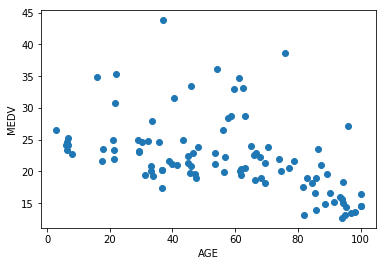

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
X=pd.DataFrame(boston.data[:100,:], columns=boston.feature_names)
y=boston.target[:100]
#データを100個に限っているのは後でグラフをプロットしたときの様子を見やすくするためです。
x=X['AGE'].values
plt.scatter(x,y)
plt.xlabel('AGE')
plt.ylabel('MEDV')
plt.show()

In [3]:
print(boston.feature_names)
X.head()

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
# メジアンMEDVカラムを表示する方法（boston.data, boston.targetを合体）
# boston2 = pd.DataFrame(
#     np.column_stack([boston.data, boston.target]), 
#     columns=np.r_[boston.feature_names, ['MEDV']])
# boston2.head()

In [5]:
from sklearn.linear_model import LinearRegression
lin_1d = LinearRegression()

In [6]:
lin_1d.fit(x[:,None],y) # 回帰線を算出
# print('Slope: %.3f' % lin_1d.coef_[0])
# print('Intercept: %.3f' % lin_1d.intercept_)
print('Slope: {:.3f}'.format(lin_1d.coef_[0]))
print('Intercept: {:.3f}'.format(lin_1d.intercept_))

Slope: -0.104
Intercept: 28.141


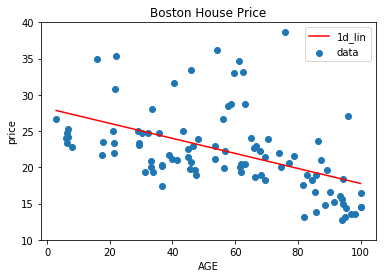

In [7]:
#まずプロット用のデータを用意します。
n = np.linspace(np.min(x),np.max(x), 1000)
y_1d_fit=lin_1d.predict(n[:,np.newaxis]) # predictの引数を2次元にする
# y_1d_fit=lin_1d.predict(n[:,None]) # こちらでもよい
plt.title("Boston House Price")
plt.scatter(x,y,label='data')
plt.plot(n,y_1d_fit,'r',label='1d_lin') # y_1d_fitの右辺を書いてもよい
plt.ylim(10,40) # グラフを見やすくするためにｙ軸のプロット範囲を絞っているだけです。
plt.xlabel("AGE")
plt.ylabel("price") # 'MEDV'のこと
plt.legend()
# plt.plot()
plt.show()

In [8]:
lin_1d.predict(25) # 予測値

array([ 25.54929674])

In [9]:
from sklearn.preprocessing import PolynomialFeatures
degree_2 = PolynomialFeatures(degree=2) # インスタンス化
degree_3 = PolynomialFeatures(degree=3)
degree_4 = PolynomialFeatures(degree=4)

In [10]:
x_2 = degree_2.fit_transform(x[:,None]) # 回帰線を算出
x_3 = degree_3.fit_transform(x[:,None])
x_4 = degree_4.fit_transform(x[:,None])

In [11]:
# なぜ線形回帰をつくるのか？？？
lin_2d = LinearRegression() # インスタンス化
lin_2d.fit(x_2,y)
lin_3d = LinearRegression() # インスタンス化
lin_3d.fit(x_3,y)
lin_4d = LinearRegression() # インスタンス化
lin_4d.fit(x_4,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

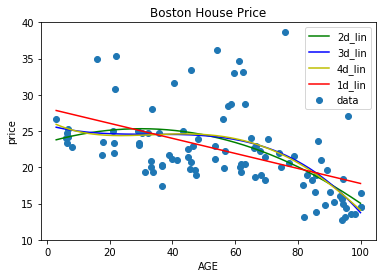

In [12]:
#まずプロット用のデータを用意します。
n = np.linspace(np.min(x),np.max(x), 1000)
y_2d_fit=lin_2d.predict(degree_2.fit_transform(n[:,np.newaxis]))
y_3d_fit=lin_3d.predict(degree_3.fit_transform(n[:,np.newaxis]))
y_4d_fit=lin_4d.predict(degree_4.fit_transform(n[:,np.newaxis]))
y_1d_fit=lin_1d.predict(n[:,np.newaxis])

plt.title("Boston House Price")
plt.scatter(x,y,label='data')
plt.plot(n,y_2d_fit,'g',label='2d_lin')
plt.plot(n,y_3d_fit,'b',label='3d_lin')
plt.plot(n,y_4d_fit,'y',label='4d_lin')
plt.plot(n,y_1d_fit,'r',label='1d_lin')
plt.ylim(10,40) # グラフを見やすくするためにｙ軸のプロット範囲を絞ります。
plt.xlabel("AGE")
plt.ylabel("price")
plt.legend()
# plt.plot()
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y,lin_1d.predict(x[:,None])))

print(mean_squared_error(y,lin_2d.predict(x_2)))
print(mean_squared_error(y,lin_3d.predict(x_3)))
print(mean_squared_error(y,lin_4d.predict(x_4)))

26.7545087041
24.3970881365
23.9782421997
23.9568169768
